## Interactive ICA

This notebook is used to compute and manually inspect ICA of the EEG data. It also specifies all signal processing related parameters and creates the respective data which will be used in the pipeline downstream. The result is saved in ica folder. 

In [2]:
import mne
from pathlib import Path

In [85]:
participants_info = [
    {'Participant': '01', 'Session': '01', 'Task': 'RotationTask'},
    {'Participant': '02', 'Session': '01', 'Task': 'RotationTask'},
    {'Participant': '03', 'Session': '01', 'Task': 'RotationTask'} # try whole pipeline on one participant
]

all_fs = [128]
h_freqs = [45, 100]

info = participants_info[2]
fs = all_fs[0]
h_freq = h_freqs[0]
ica = False

base_path = Path("..") / f"data/sub-{info['Participant']}/"
eeg = mne.io.read_raw_fif(base_path / "preprocessed" / f"{fs}hz_1-{h_freq}_eeg_ica-False.fif", preload=True)
ica = mne.preprocessing.read_ica(base_path / "ica" / f"{fs}hz_1-{h_freq}_ica.fif")

Opening raw data file ..\data\sub-03\preprocessed\128hz_1-45_eeg_ica-False.fif...


C:\Users\pgraf\AppData\Local\Temp\ipykernel_9032\2031217405.py:16: RuntimeWarning: This filename (..\data\sub-03\preprocessed\128hz_1-45_eeg_ica-False.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(base_path / "preprocessed" / f"{fs}hz_1-{h_freq}_eeg_ica-False.fif", preload=True)


    Range : 0 ... 602965 =      0.000 ...  4710.664 secs
Ready.
Reading 0 ... 602965  =      0.000 ...  4710.664 secs...
Reading c:\Users\pgraf\ucloud2\arbeit_projekte\lernen\compscie\eeg_decoder_project\notebooks\..\data\sub-03\ica\128hz_1-45_ica.fif ...
Now restoring ICA solution ...
Ready.


## Manually decide

* first 30 components
* look for centralized components (atypical for brain waves)
* very high frequency, visible peaks (atypical)
* psd not at 10hz not 1/f shape

https://www.youtube.com/watch?v=AXCxrDikpaM&list=PLXc9qfVbMMN2uDadxZ_OEsHjzcRtlLNxc&index=12

In [86]:
ica.get_explained_variance_ratio(inst=eeg, components=range(0,29))

{'eeg': 0.9060676159330163}

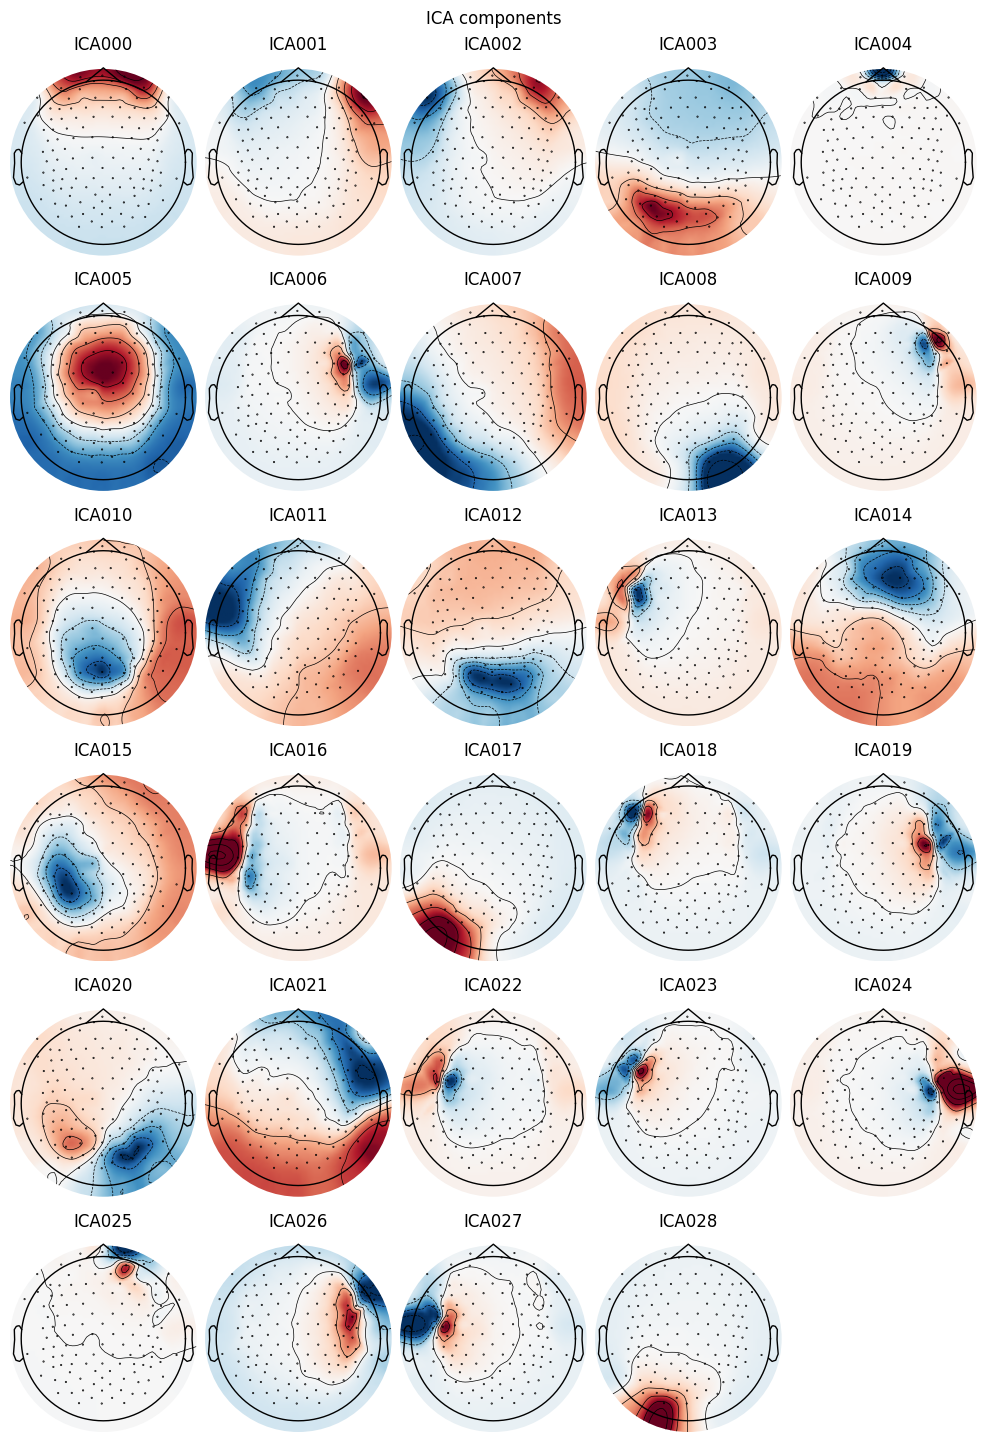

In [74]:
res = ica.plot_components(range(0, 29))

In [92]:
%matplotlib qt
res = ica.plot_sources(inst=eeg, block=True)
%matplotlib inline

Creating RawArray with float64 data, n_channels=125, n_times=602966
    Range : 0 ... 602965 =      0.000 ...  4710.664 secs
Ready.


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
2355 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2355 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2355 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2355 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2355 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2355 matching events found
No baseline correction applied
0 projection items activated


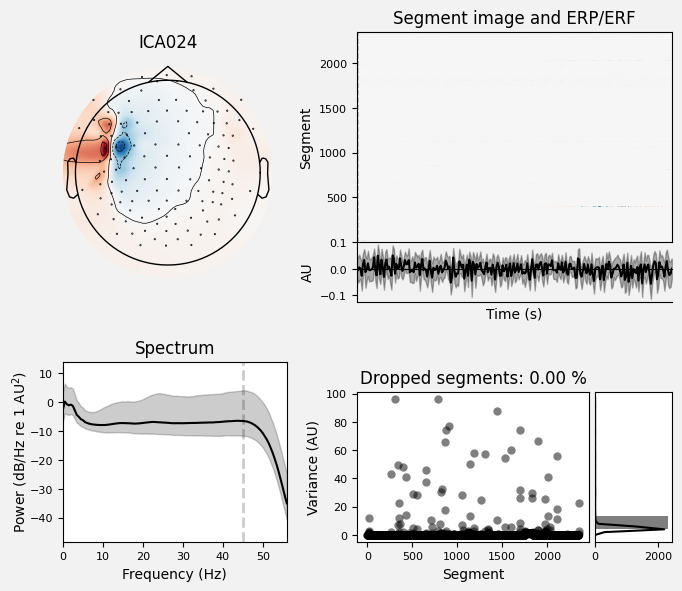

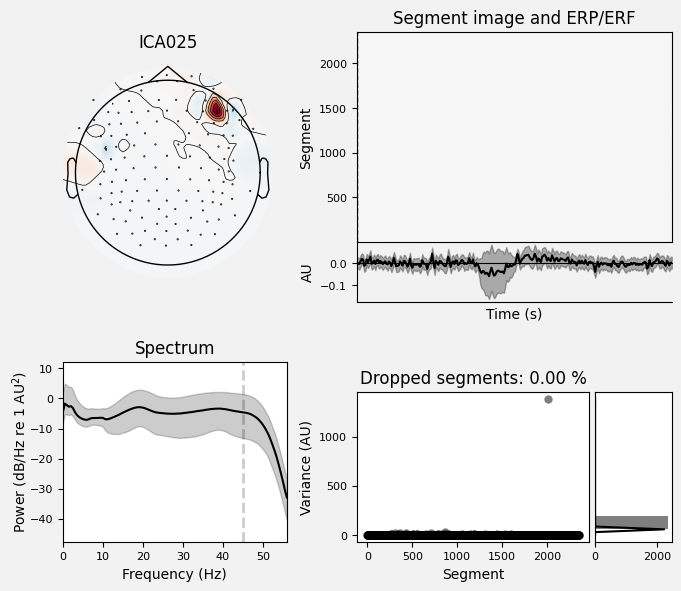

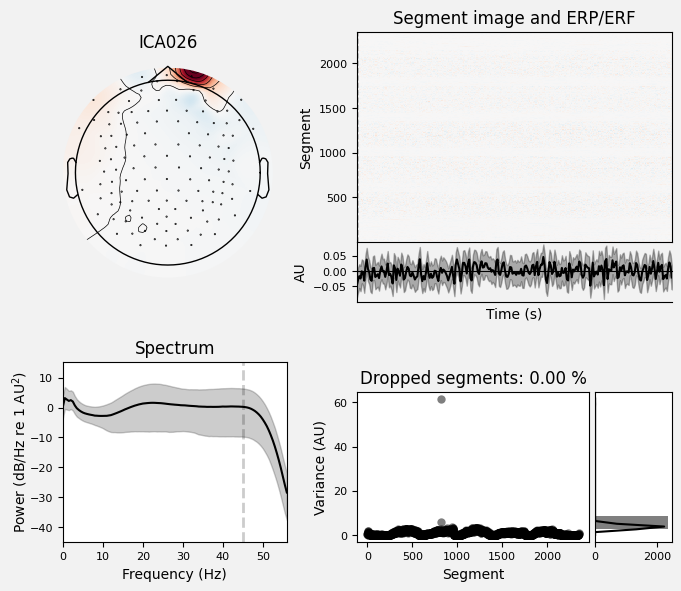

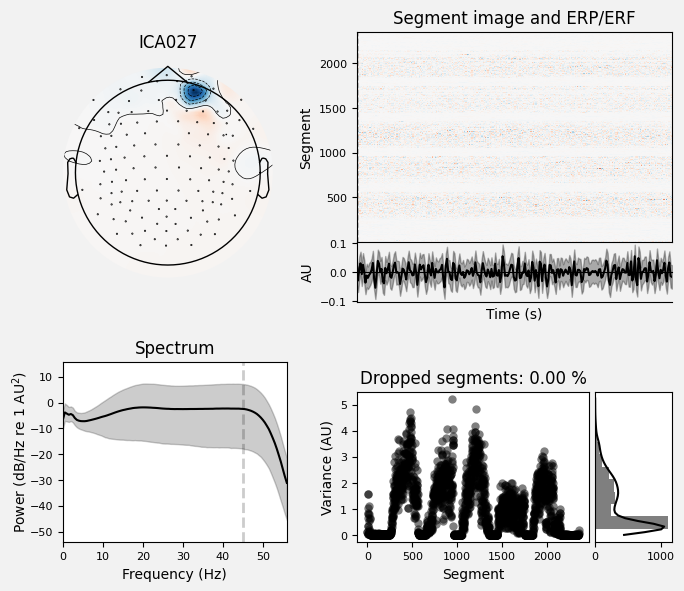

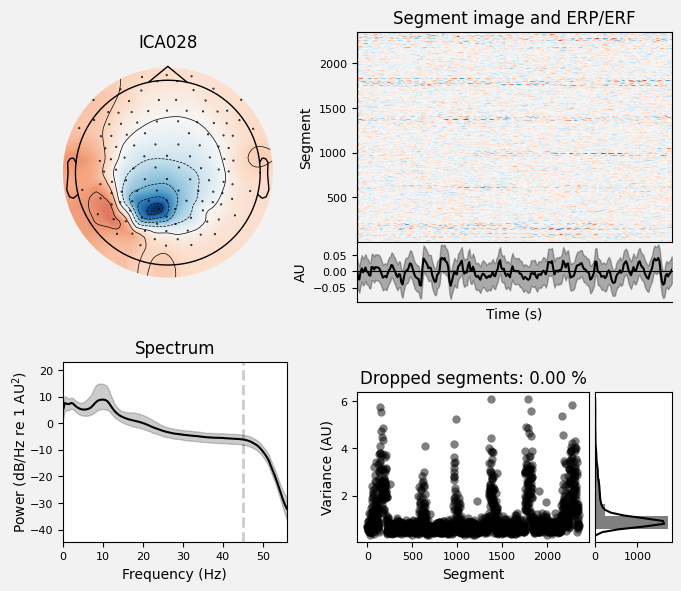

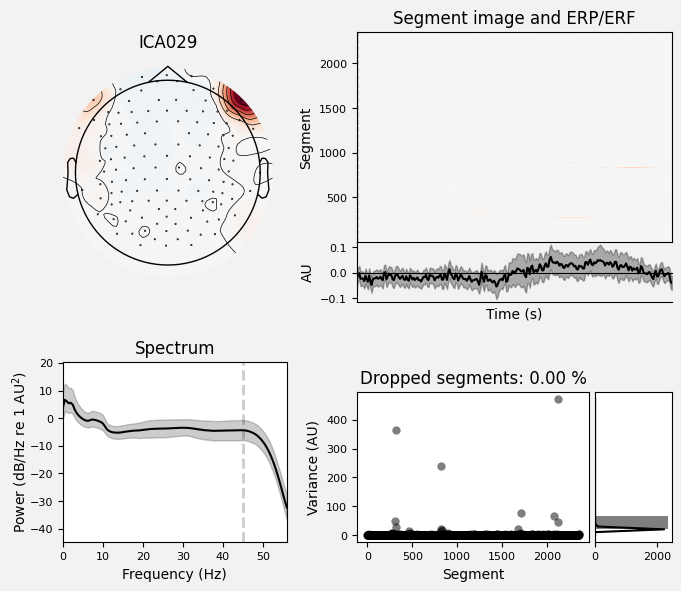

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [91]:
ica.plot_properties(inst=eeg, picks=range(24,30))

In [93]:
excludes = [0,1,2,3,12,13,15,18,20,25,26,27,29]

In [94]:
ica.get_explained_variance_ratio(inst=eeg, components=excludes)

{'eeg': 0.7066570796084475}

In [95]:
ica.exclude = excludes
eeg_filtered = ica.apply(inst=eeg)

Applying ICA to Raw instance
    Transforming to ICA space (125 components)
    Zeroing out 13 ICA components
    Projecting back using 126 PCA components


In [96]:
eeg_filtered.save(base_path / "preprocessed" / f"{fs}hz_1-{h_freq}_eeg_ica-True.fif", overwrite=True)
ica.save(base_path / "ica" / f"{fs}hz_1-{h_freq}_ica.fif", overwrite=True)

Overwriting existing file.
Writing c:\Users\pgraf\ucloud2\arbeit_projekte\lernen\compscie\eeg_decoder_project\notebooks\..\data\sub-03\preprocessed\128hz_1-45_eeg_ica-True.fif
Overwriting existing file.


C:\Users\pgraf\AppData\Local\Temp\ipykernel_9032\53325168.py:1: RuntimeWarning: This filename (c:\Users\pgraf\ucloud2\arbeit_projekte\lernen\compscie\eeg_decoder_project\notebooks\..\data\sub-03\preprocessed\128hz_1-45_eeg_ica-True.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_filtered.save(base_path / "preprocessed" / f"{fs}hz_1-{h_freq}_eeg_ica-True.fif", overwrite=True)


Closing c:\Users\pgraf\ucloud2\arbeit_projekte\lernen\compscie\eeg_decoder_project\notebooks\..\data\sub-03\preprocessed\128hz_1-45_eeg_ica-True.fif
[done]
Overwriting existing file.
Writing ICA solution to c:\Users\pgraf\ucloud2\arbeit_projekte\lernen\compscie\eeg_decoder_project\notebooks\..\data\sub-03\ica\128hz_1-45_ica.fif...
Overwriting existing file.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,79 iterations on raw data (602966 samples)
ICA components,125
Available PCA components,126
Channel types,eeg
ICA components marked for exclusion,ICA000ICA001ICA002ICA003ICA012ICA013ICA015ICA018ICA020ICA025ICA026ICA027ICA029
